In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Test import of AAPL (Apple) stock

In [2]:
df = pd.read_csv('../raw_data/data/daily/us/nasdaq stocks/1/aapl.us.txt')

Test use of TA lib to calculate RSI

In [3]:
from ta.momentum import StochRSIIndicator

<AxesSubplot:>

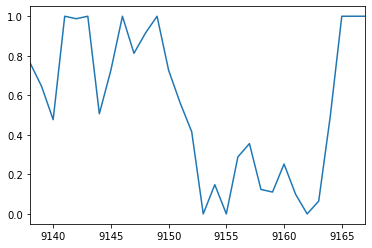

In [4]:
StochRSIIndicator(df['<CLOSE>']).stochrsi().tail(30).plot()

Checking how many datapoints (days) there are per each stock. Are there any stocks with no data.

In [7]:
import os

history = {}
history_counter = 0
dups = []

ticker_counter = 0
for subdir, dirs, files in os.walk(r'../raw_data/data/daily/us/nasdaq stocks/'):
    print(not subdir.endswith('.ipynb_checkpoints'))
    for filename in files:
        filepath = subdir + os.sep + filename
        if filename.endswith('txt'):
            name = filename[:-4]
            if name in history:
                dups.append(name)
            ticker_counter += 1
            with open(filepath) as f:
                rows_num = sum(1 for line in f)
                history[name] = rows_num

True
True
False
True
False


In [39]:
print(f'There are {len(history)} tickers in the db and {len(dups)} duplicates.')

There are 3931 tickers in the db and 0 duplicates


In [40]:
history_df = pd.Series(history).sort_values(ascending=False)

Top 5 companies in terms of lenght of the history:

In [41]:
history_df.head(5)

aep.us-checkpoint    12880
aep.us               12880
gt.us                12878
intc.us              12361
pep.us               11112
dtype: int64

Number of companies with history shorter than 90 and 1000 days (c.a. 3 years)

In [49]:
less_90 = len(history_df[history_df <= 90])
less_1000  = len(history_df[history_df <=1000])
print(f'There are {less_90} tickers with shorter price history than 90 days.\nThere are {less_1000} companies with shorter price history than 1000 days\
 out of {less_1000} tickers e.g. {round((less_1000/len(history))*100, 0)}%')

There are 520 tickers with shorter price history than 90 days.
There are 1774 companies with shorter price history than 1000 days out of 1774 tickers e.g. 45.0%


In [50]:
training_tickers = history_df[history_df > 1000]

In [51]:
print(f'We have {len(training_tickers)} tickers for training, that translates to c.a. {training_tickers.sum()} training datapoints')

We have 2157 tickers for training, that translates to c.a. 6790853 training datapoints
